## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [58]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

import graphviz

from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

boston = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
X = boston.drop('medv', axis=1)
y = boston['medv'] 

In [2]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_regressor = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_regressor.fit(X_train, y_train)

predictions_train = tree_regressor.predict(X_train)

mse_train = mean_squared_error(y_train, predictions_train)
print(f"MSE na base de treinamento: {mse_train:.4f}")

MSE na base de treinamento: 1.9490


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

Text(0, 0.5, 'Impureza total das folhas')

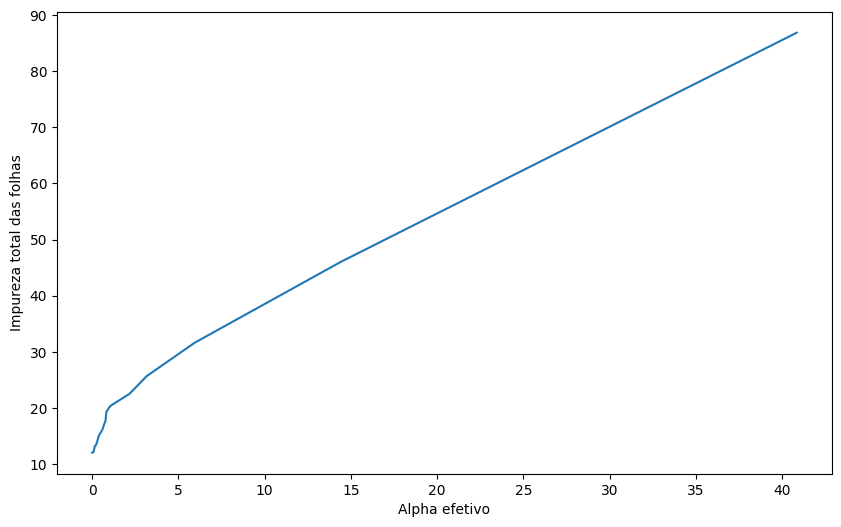

In [25]:
regr_a = DecisionTreeRegressor(max_depth=8, min_samples_leaf=10)
regr_a.fit(X_train, y_train)

path = regr_a.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")


### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [27]:
trees = []

for alpha in ccp_alphas:
    tree = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    tree.fit(X_train, y_train)
    
    trees.append(tree)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [31]:
mse_values = []

for tree in trees:
    y_pred = tree.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

for i, mse in enumerate(mse_values):
    print(f"MSE for Tree {i + 1}: {mse:.4f}")

MSE for Tree 1: 10.4161
MSE for Tree 2: 10.4512
MSE for Tree 3: 9.2163
MSE for Tree 4: 9.3452
MSE for Tree 5: 9.3452
MSE for Tree 6: 8.8349
MSE for Tree 7: 8.8030
MSE for Tree 8: 8.8030
MSE for Tree 9: 8.8030
MSE for Tree 10: 9.0118
MSE for Tree 11: 8.7802
MSE for Tree 12: 8.7802
MSE for Tree 13: 8.0081
MSE for Tree 14: 8.5437
MSE for Tree 15: 9.9177
MSE for Tree 16: 9.4336
MSE for Tree 17: 9.9760
MSE for Tree 18: 10.5649
MSE for Tree 19: 10.5649
MSE for Tree 20: 10.4732
MSE for Tree 21: 10.4283
MSE for Tree 22: 10.7275
MSE for Tree 23: 13.9550
MSE for Tree 24: 19.2377
MSE for Tree 25: 32.3766
MSE for Tree 26: 32.3766
MSE for Tree 27: 46.9178


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

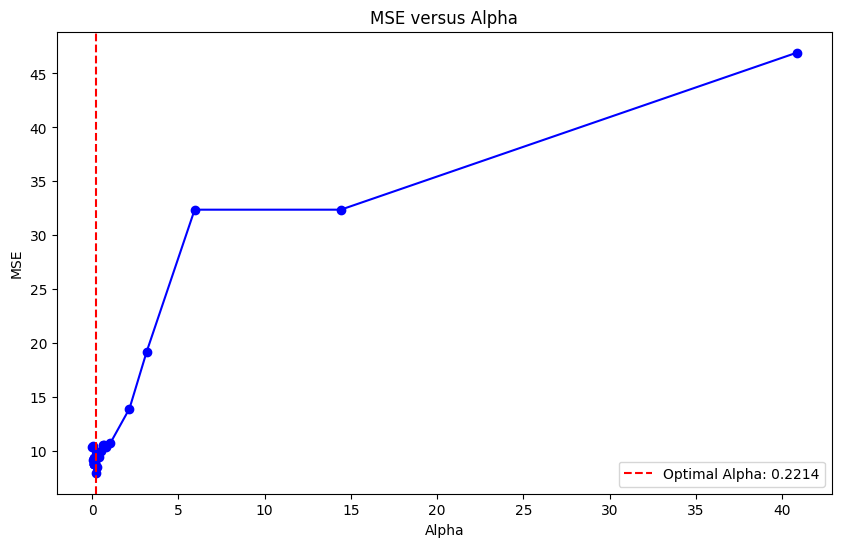

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, mse_values, marker='o', linestyle='-', color='b')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE versus Alpha')

min_mse_index = mse_values.index(min(mse_values))
optimal_alpha = ccp_alphas[min_mse_index]
plt.axvline(x=optimal_alpha, color='r', linestyle='--', label=f'Optimal Alpha: {optimal_alpha:.4f}')
plt.legend()

plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [44]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

leaf_indices = tree_model.apply(X_test)

print("Índices das folhas para os primeiros 5 pontos de dados de teste:")
print(leaf_indices[:5])

Índices das folhas para os primeiros 5 pontos de dados de teste:
[243 331 419  72 477]


### 7. Visualize esta árvore.

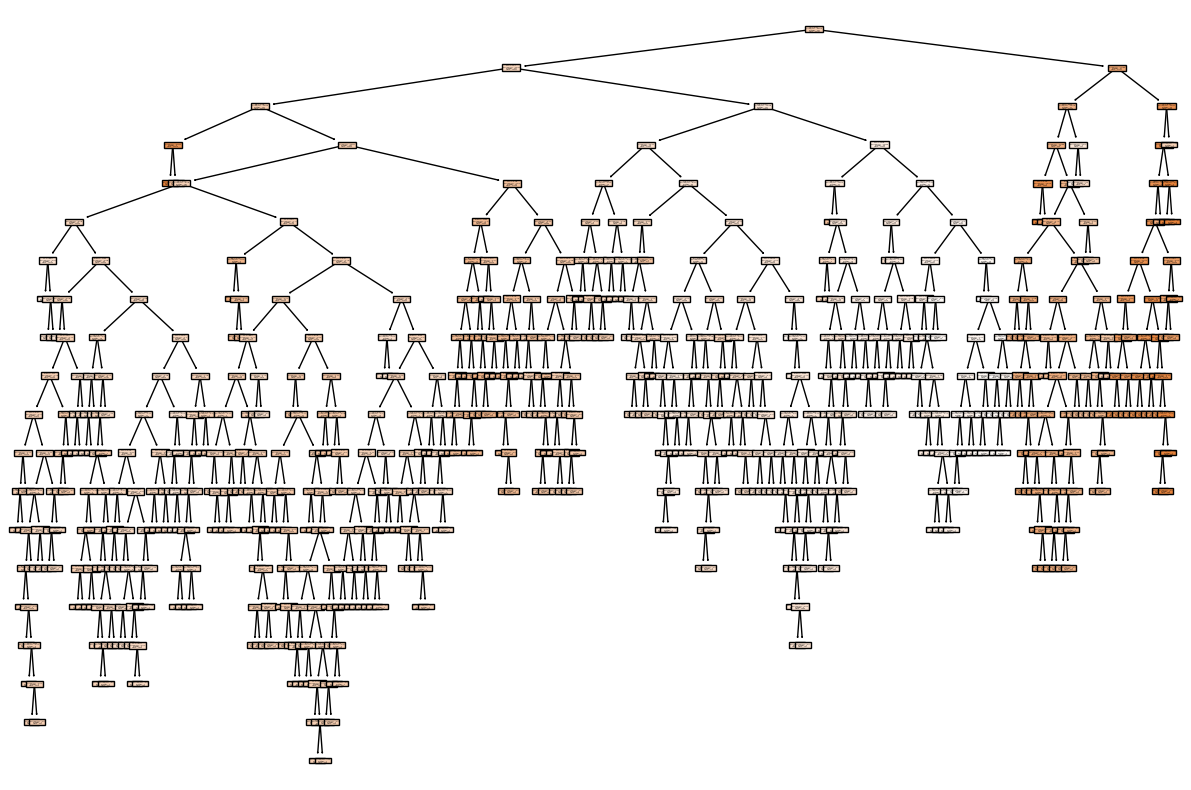

In [59]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns)
plt.show()